<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Знакомство-с-данными" data-toc-modified-id="Шаг-1.-Знакомство-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Знакомство с данными</a></span></li><li><span><a href="#Шаг-2.-Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Шаг-2.-Исследовательский-анализ-данных-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Исследовательский анализ данных (EDA)</a></span></li><li><span><a href="#Шаг-3.-Построение-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Шаг-3.-Построение-модели-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Построение модели прогнозирования оттока клиентов</a></span></li><li><span><a href="#Шаг-4.-Кластеризация-клиентов" data-toc-modified-id="Шаг-4.-Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Кластеризация клиентов</a></span></li><li><span><a href="#Шаг-5.-Выводы-и-базовые-рекомендации-по-работе-с-клиентами:" data-toc-modified-id="Шаг-5.-Выводы-и-базовые-рекомендации-по-работе-с-клиентами:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Шаг 5. Выводы и базовые рекомендации по работе с клиентами:</a></span></li></ul></div>

# Проект "Прогнозирование вероятности оттока клиента фитнес-клуба в следующем месяце"

**Основная цель**:
- В рамках разрабатываемой стратегии взаимодействия с клиентами необходимо провести анализ данных и подготовить пошаговый план действий, направленный на удержание клиентов. 

**Постановка задач**:
- Научиться прогнозировать вероятность оттока на уровне следующего месяца для каждого клиента. 
- Сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- Проанализировать основные признаки, наиболее сильно влияющие на отток;
- Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    - 1) выделить целевые группы клиентов;
    - 2) предложить меры по снижению оттока;
    - 3) определить другие особенности взаимодействия с клиентами.
    
**Данные**:
- оцифрованные клиентские анкеты (csv-файл)

**Структура датафрейма, с которым предстоит работать:**


- **Данные клиента за предыдущий до проверки факта оттока месяц**:
    - **'gender'** — пол;
    - **'Near_Location'** — проживание или работа в районе, где находится фитнес-центр;
    - **'Partner'** — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    - **Promo_friends** — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    - **'Phone'** — наличие контактного телефона;
    - **'Age'** — возраст;
    - **'Lifetime'** — время с момента первого обращения в фитнес-центр (в месяцах).
- **Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента**:
    - **'Contract_period'** — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
    - **'Month_to_end_contract'** — срок до окончания текущего действующего абонемента (в месяцах);
    - **'Group_visits'** — факт посещения групповых занятий;
    - **'Avg_class_frequency_total'** — средняя частота посещений в неделю за все время с начала действия абонемента;
    - **'Avg_class_frequency_current_month'** — средняя частота посещений в неделю за предыдущий месяц;
    - **'Avg_additional_charges_total'** — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- **'Churn'** — факт оттока в текущем месяце.

## Шаг 1. Знакомство с данными

In [1]:
#Импортируем все необходимые бибилиотеки
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
#прочитаем csv файл
df = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
#выведем первые 5 строк
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
#посмотрим на наличие дубликатов
df.duplicated().sum()

0

In [5]:
#выведем общую информацию о датафрейме, где посмотрим на его размер, и типы данных в столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

- **Если посмотреть на тип данных, то все они числовые**. Однако стоит отметить, что **пол** является **категориальной переменной**, однако уже **изначально обработан и представлен в таблице в виде 0 и 1**. 
- **Большинство столбцов имеет тип 'integer'**.
- **Тип 'float' имеют столбцы, в которых содержится информация о:**
    - суммарной выручке от других услуг фитнес-центра 
    - срок до окончания текущего действующего абонемента (в месяцах) - *можно поменять на int*
    - средней частоте посещений в неделю за все время с начала действия абонемента
    - средней частоте посещений в неделю за предыдущий месяц

In [6]:
#заменим тип данных в столбце Month_to_end_contract:
df['Month_to_end_contract'] = df['Month_to_end_contract'].astype('int')
print(f'Тип данных в столбце Month_to_end_contract: {df["Month_to_end_contract"].dtype}')

Тип данных в столбце Month_to_end_contract: int64


**Перейдём к исследовательскому анализу данных, посмотрим на средние значения и стандартные отклонения методом describe**.

**Пока мы располагаем данными, что**:
- в датафрейме 4000 записей о клиентах и 14 колонок, отражающих тот или иной признак. 
- пропусков нет
- категориальная переменная 'gender' переведа в числое значение, где пол представлен в виде значений [0;1].
- тип данных в столбце Month_to_end_contract изменён на integer. 

**Опциональное дополнение:**

In [7]:
#так как пол представлен в виде 0 и 1, есть любопытство посмотреть, как были соотнесены 0 и 1 и пол: мужской и женский.
#было сделано предположения, что групповые занятия - прерогатива женщин. Посмотрим:
print('Выведем информацию с группировой по посещению групповых занятий:')
print(df.groupby('Group_visits')['gender'].value_counts(normalize = True))
print()
print('Выведем информацию с группировой по полу:')
print(df.groupby('gender')['Group_visits'].value_counts(normalize = True))

Выведем информацию с группировой по посещению групповых занятий:
Group_visits  gender
0             1         0.502765
              0         0.497235
1             1         0.520922
              0         0.479078
Name: gender, dtype: float64

Выведем информацию с группировой по полу:
gender  Group_visits
0       0               0.596733
        1               0.403267
1       0               0.579128
        1               0.420872
Name: Group_visits, dtype: float64


**Распределение +- равномерное. Пол под №1 по доле превышает пол под №0 как в сравнении с непосещением групповых, так и в сравнении с посещением**.

А вот если посмотреть на распределениее по полу, то:
- у пола 0: 60% не посещают групповые, а 40% посещают. То есть разница между группами 20 п.п. в пользу тех, кто не посещает
- у пола 1: 58% не посещают групповые, а 42% посещают. ТТо есть разница между группами 16 п.п. в пользу тех, кто не посещает.

Для решения задачи это не имеет никакого значения и обычно в документации написано, какому полу какое значение присваивается, но для понимания общей картины хотелось сложить по этому признаку тоже свою картину с распределением. Однако, будем основываться на том, что соотношение полов в датафрейме равномерное. 

## Шаг 2. Исследовательский анализ данных (EDA)

In [8]:
#прежде чем выводить метод describe, посмотрим, сколько клиентов остались, а сколько ушли в отток
churn_stat = df['Churn'].value_counts().reset_index().rename(columns = {'index': 'Факт оттока', 'Churn': 'Количество'})
churn_stat['Доля (%)'] = round(churn_stat['Количество'] / churn_stat['Количество'].sum() * 100, 2)
churn_stat

,Факт оттока,Количество,Доля (%)
0,0,2939,73.47
1,1,1061,26.52


In [9]:
#изучим средние значения и стандартные отклонения методом describe()
df.describe(percentiles = [.25, .5, .75, .85, .99])

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
85%,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,33.000000,250.084735,11.000000,7.000000,2.907509,2.919537,1.000000
99%,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,37.000000,400.996125,12.000000,17.000000,4.197579,4.185758,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Согласно первичного анализа данных**:
- **пропуски** в столбцах отсутствуют
- **распределение по полу практически равномерное** (пол представлен в бинарном виде и из данных о клиентах нет информации, какой пол отнесет к 0, а какой к единице)
- **более 80% лиц посещают фитнес-клуб рядом с домом или работой**
- **лишь 30%** пришли в фитнес-клуб **через акцию "Приведи друга"**
- **чуть менее половины (48.7%) клиентов являются сотрудниками партнеров**, которым предоставляется скидка на абонементы в фитнес зал. 
- **Наибольшее количество абонементов** приобретено **на месяц**. **75% клиентов** обладают абонементами продолжительностью **1 и 6 месяцев**. 
- **Среднее количество посещений в неделю не превышает 2-х раз**. При этом медиана выше среднего значения и составляет примерно 2,5. 
- В текущем месяце **отток составил 26%**. То есть четверть от всех клиентов
- **Клиентами** являются **лица от 18 до 41 года**. **Среднее значение возраста** совпадает с медианным и составляет **29 лет**. 
- В среднем **время с момента первого обращения в фитнес-центр составляет более 3-х, но менее 4-х месяцев**. При этом **медиана** составляет **3 месяца**, а **максимальное 2 года и 7 месяцев**, второй по продолжительности клиент выбирает услуги фитнес-центра на протяжении 1,5 лет. 
- Согласно информации о том, что минимальное значение в столбце Lifitime = 0, наводит на мысль, что человек только купил абонемент и еще не ходил в зал. Посмотрим, как много из них ушли в отток. 

In [10]:
zero_lifetime = df.query('Lifetime == 0')['Churn'].value_counts().reset_index().rename(columns = {'index': 'Факт оттока', 'Churn': 'Количество'})
zero_lifetime['Доля (%)'] = round(zero_lifetime['Количество'] / zero_lifetime['Количество'].sum() * 100, 2)
zero_lifetime

,Факт оттока,Количество,Доля (%)
0,1,403,82.75
1,0,84,17.25


**Выходит, что не совсем так. Лица с Lifetime = 0, на 82.75% подвержены оттоку**. 

С другой стороны, они принесли компании дополнительный доход за покупку абонемента, при этоми так и не нашли сил прийти в зал. Компании это может быть в плюс как получение дохода без необходимости обслуживания клиента, с другой стороны, этот клиент потерян, так как прибыль от него была разовой и в будущем он доходность компании не приумножит. 

In [11]:
#выведем средние значения по столбцам, сгруппировав данные по факту оттока
df.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


**Проанализируем средние значения признаков по факту оттока, которые представлены выше:**
- **Распределение по полу равномерное**. С небольшим отклонением в сторону пола №1. **В обоих случаях доля тех, кто предоставил свой номер телефона составила 90%**. 
- **25% клиентов, которые ушли, не выбирали фитнес-клуб по признаку близкого расположения к дому или работе**. Напротив, **среди тех, кто остался клиентом, 87% предпочитают не тратиться на дорогу**, выбирая занятия рядом с работой или домом. 
- **53% текущих клиентов пользуются скидками работодателя, являющегося партнером фитнес клуба**. Чем больше человек подвержен оттоку, тем больше вероятность, что лишь в 1 случае из 3 он купил абонемент, воспользовавшись скидкой партнера.
- **Клиенты, не подверженные оттоку (текущие), имеют более высокое значение по длительности текущего действующего абонемента**. Среднее значение приближено к **6 месяцам (5.7)**, в то время как **ушедшие клиенты предпочитали более короткий срок абонемента. Среднее значение 1.72)**. 
- **Большинство столбцов можно оценить в совкупности**. Так, следует вывод о том, что **текущие клиенты более возрастные** (разница с теми, кто ушел в отток 3 года: ~ 30 и ~ 27 лет), **более дисциплинированные** (посещают зал в неделю в два раза чаще чем ушедшие в отток: 2 и 1 раз в неделю), при том, что **многие текущие клиенты в среднем посещают этот фитнес-клуб ~ 5 месяце** (считая с момента первого визита), **а те, кто ушел в отток не занимался в среднем и более месяца**. **Интерес в групповым в среднем также выше у текущих клиентов**, **денежных средств за дополнительные услуги они также в среднем приносят больше**. 

In [12]:
#создадим списки из столбцов, подразумевающих бинарность (значения в столбце: 0, 1), 
# и столбцы с числовыми значениями для дальнейшей отрисовки столбчатых гистограмм и распределения признаков
col_b = []
col_num = []
for column in df.columns:
    if df[column].min() == 0 and df[column].max() == 1:
        col_b.append(column)
    else:
        col_num.append(column)
        
print('Столбцы для построения графиком с помощью hist(): \n', col_b)
print()
print('Столбцы для построения гистограмм и распределения признаков: \n', col_num)

Столбцы для построения графиком с помощью hist(): 
 ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Churn']

Столбцы для построения гистограмм и распределения признаков: 
 ['Contract_period', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']


**Сначала построим графики для тех признаков, где значения представлены в виде 0 и 1, затем перейдем к построению гистограмм и распределения признаков по наиболее интересным столбцам, отличающимся множественностью принимаемых значений**. 

*Стоит заранее отметить, что графики лишь визуализируют то, что мы уже посмотрели методом describe и функцией mean с разбивкой по факту оттока*. 

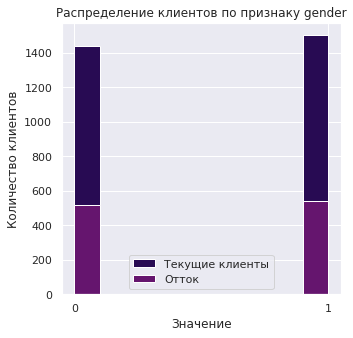

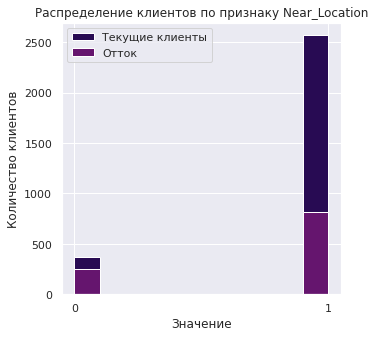

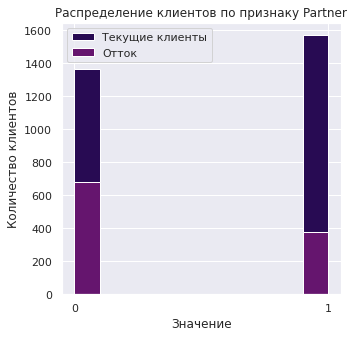

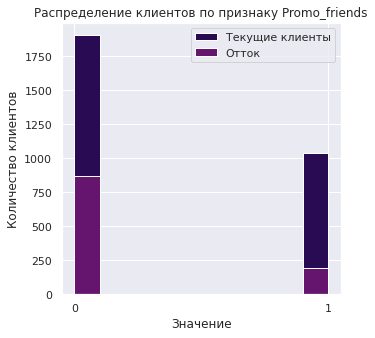

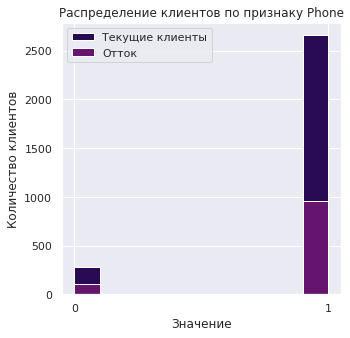

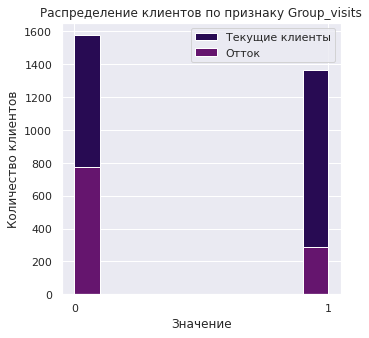

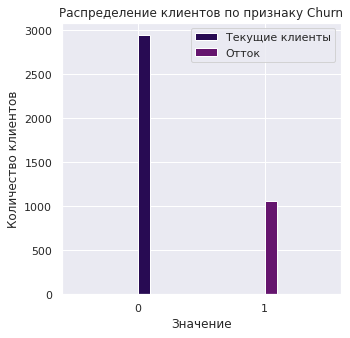

In [13]:
#построим графики для 'бинарных' столбцов
for column in col_b:
    sns.set_theme(palette = 'inferno')
    plt.figure(figsize=(5, 5))
    plt.title('Распределение клиентов по признаку ' + column)
    df.groupby('Churn')[column].hist()
    plt.ylabel('Количество клиентов') # y-метка
    plt.xlabel('Значение') # x-метка
    plt.legend(['Текущие клиенты', 'Отток'])
    plt.xticks([0,1])
    plt.show()

**Как и было сказано ранее, графики наглядно показывают, как распределены значения между клиентами текущими и теми, что ушли в отток**. 
- Пока точно можно сказать, что 25%-ый отток произошел за предыдущий месяц. Из 4000 клиентов 1000 ушла в отток. При этом мы уже определили в момент оценки записей с Lifetime == 0, что 403 клиента так и не посетили зал. Значит всего 60% ушли в отток не только по причине отсутствия времени, мотивации и дисциплины, а скорее и по другим причинам. 
- Если мы видим, что по полу распределение равномерное, то любителей ездить на фитнес в место, отдаленное от работы и дома, не так много. Их количество не превышает 1000. 
- Остальные показатели визуализированы однако все выводы по ним сделаны выше. Ничего нового тут нет. 

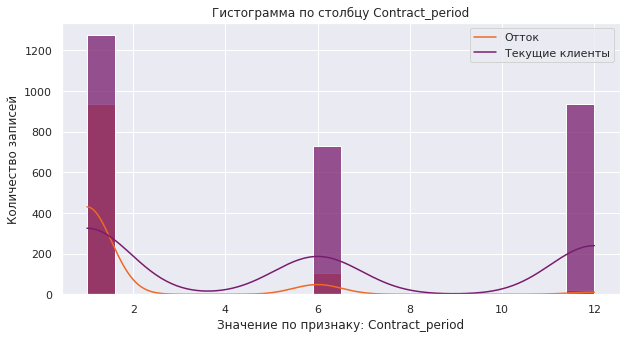

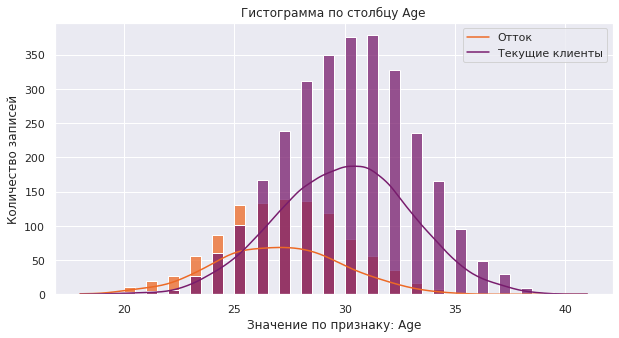

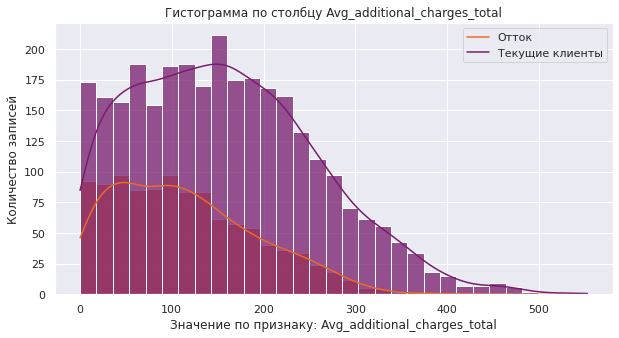

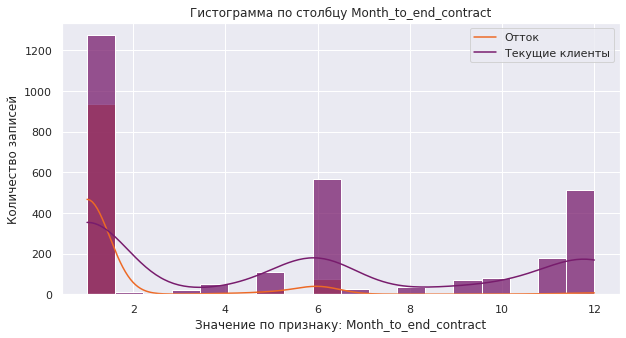

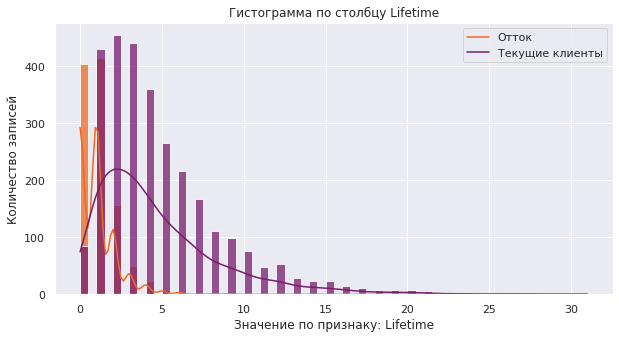

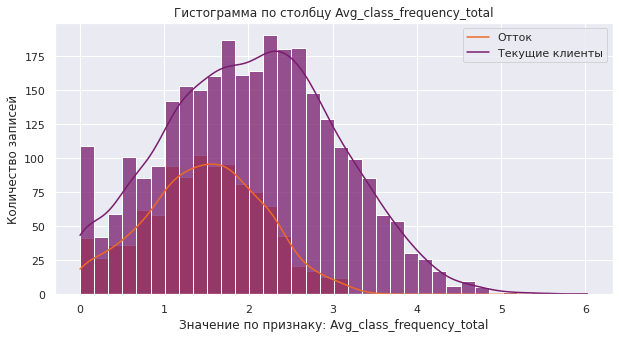

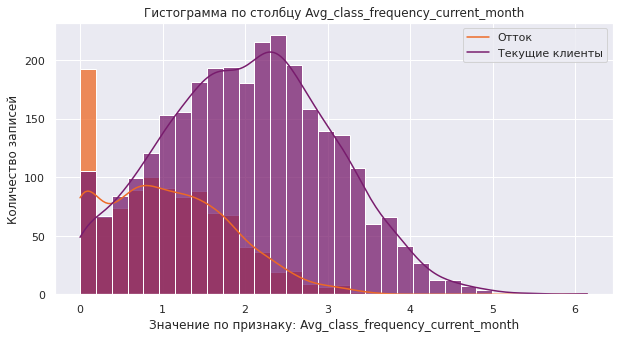

In [14]:
#построим столбчатые гистограммы и распределения признаков
for column in col_num:
    plt.figure(figsize=(10, 5))
    plt.title('Гистограмма по столбцу ' + column)
    sns.histplot(data = df, x = column, hue = 'Churn', kde = True, palette = 'inferno', alpha = 0.75)
    plt.legend(['Отток', 'Текущие клиенты'])
    plt.ylabel('Количество записей') # y-метка
    plt.xlabel('Значение по признаку: ' + column) # x-метка
    plt.show()

**Напишем анализ по данным графикам**:

**Ушедшие клиенты характеризуются следующими образом:**
- Явное преобладание лиц, приобретающих абонемент на месяц. Затем количество лиц, которые приобрели абонемент на 6 или 12 месяц сокращается. На 12 месяцах стремится к 0. 
- Возраст клиента от 20 до 35 лет, при том, что большинство значений лежит между 25 и 27 годами (до текущего значения идет равномерное увеличения количества клиентов). Затем значения идут на спад. 
- Большинство значений по признаку средней стоимости оплаченных доп.услуг варьируется в диапазоне до 100, затем значения идут на спад. Максимум: чуть более 300
- Распределение по количеству месяцев до конца абонемента не равномерное. В основном представлено значения в диапазоне 1,2 месяца с небольшой долей клиентов в районе 6 месяцев. 
- По признаку 'Lifetime' достаточно короткая продолжительность пользования услугами с момента первого посещения. При пике в 1 месяц, скачкообразное и быстрое снижение количества пользователей при приближении к 5 месяцам. Жизненный цикл тех, кто подвержен оттоку не велик. 
- По средней частоте посещений зала в неделю как в общем с момента начала абонемента, так и в предыдущем месяце, наблюдается большое количество тех, кто ни разу не посетил зал в предыдыщем месяце. В общем с момента начала абонемента их доля также высока. Большинство значений в общем с момента начала абонемента лежит между 1 и 2 посещениями, в то время как в предыдущем месяце это значение было смещено влево и было распределено около 1 посещения в неделю. 

**Текущие клиенты характеризуются следующими образом:**
- Большинство (> 1200) приобретают абонемент на месяц, однако ~ 1000 клиентов купили абонемент на год, количество клиентов, которые приобрели абонемент на 6 месяцев составляет чуть более 700. 
- Возраст клиента более разбросан в диапазоне. Здесь клиента представлены лицами от 20 до 40 лет. Наиболее число клиентов в возрасте 30-31 год (до текущего значения идет равномерное увеличения количества клиентов). Затем значения идут на спад. 
- Большинство значений по признаку средней стоимости оплаченных доп.услуг варьируется в диапазоне до 200, затем значения идут на спад. Максимум: ~ 500 (что на 200 больше, чем макисмальный лимит по тем, кто ушел в отток)
- Распределение по количеству месяцев до конца абонемента не равномерное. В основном представлено значениями 1,6, 12 месяцев. График скачкообразный. 
- По признаку 'Lifetime' достаточно большой разброс. Большинство значений лежит в диапазоне до 10 месяцев, при том, что максимум представлен в районе 3-4 месяцев, а затем наблюдается планомерный спад. Максимальный Lifetime - более 30 месяцев. 
- По средней частоте посещений зала в неделю как в общем с момента начала абонемента, так и в предыдущем месяце, количество тех, кто ни разу не посетил зал не велико. Как в предыдущем, так и в общем с момента начала абонемента большее количество значений лежит в диапазоне между 2 и 3 посещениями. После значения в 3 посещения в неделю, количество клиентов уменьшается. И количество клиентов, посещающих зал более 5 дней в неделю стремится к нулю. 

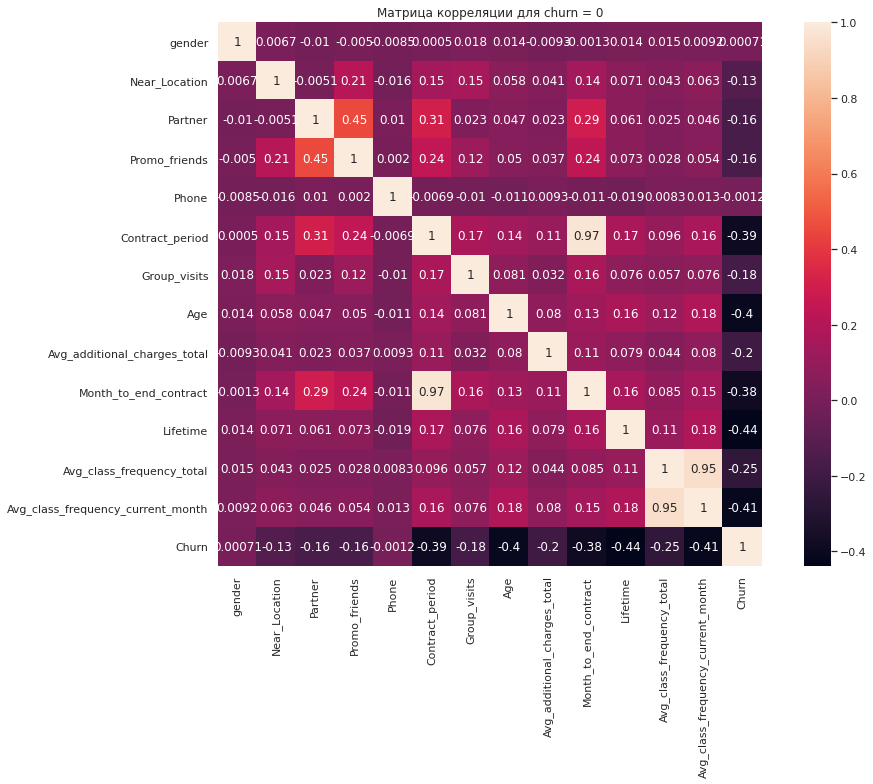

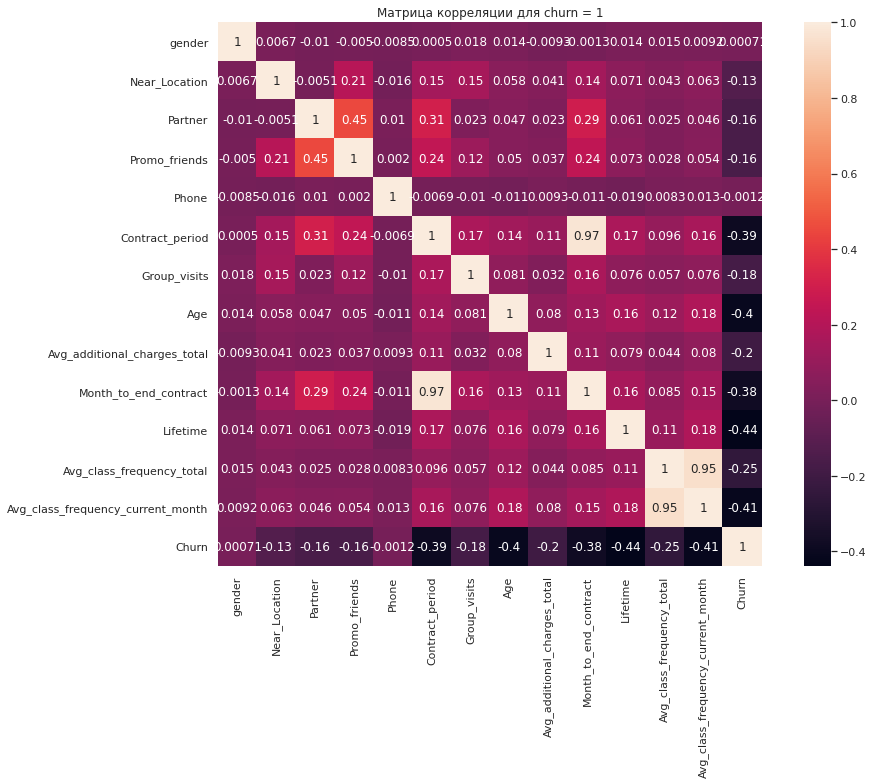

In [15]:
#построим матрицу корреляции
for churn in df['Churn'].unique():
    plt.figure(figsize = (15,10))
    plt.title(f'Матрица корреляции для churn = {churn}', )
    sns.heatmap(df.corr(), square=True, annot = True);
    plt.show()

**Мы видим по матрице корреляции две пары признаков, которые избыточно коррелируют друг с другом (наблюдается мультиколлинеарность двух признаков)**:
- **1) Contract_period** & **Month_to_end_contract** 
- **2) Avg_class_frequency_total** & **Avg_class_frequency_current_month**

**При построении модели будут удалены**:
- *Month_to_end_contract*
- *Avg_class_frequency_current_month*

Если перейти к дальнейшему анализу матрицы корреляции, то стоит отметить, что в теории **Слабой взаимосвязью обладают признаки, у которых абсолютное значение больше 0,25 и меньше 0,5**. При этом **умеренная взаимосвязь характеризуется абсолютным значением в диапазоне от 0,5 до 0.75**.

- **Ни один из признаков не обладает умеренной взаимосвязью с целевой переменной**. Однако, стоит заметить, что **слабая отрицательная корреляция наблюдается с признаками**:
   - Lifetime (на уровне -0.44), 
   - Contract Period (- 0.39), 
   - Age (-0,4), 
   - Avg_class_frequency_current_month (-0.41).

**При этом выделим 2 признака, с которыми не наблюдается взаимосвязь (< 0.1) целевой переменной**:
- пол
- телефон.

## Шаг 3. Построение модели прогнозирования оттока клиентов

**Задачи:**
- Построить модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

- Разбить данные на обучающую и валидационную выборку функцией train_test_split().

- Обучить модель на train-выборке двумя способами:
    - логистической регрессией (LogisticRegression()),
    - случайным лесом (RandomForestRegressor()).
- Оценить метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравнить по ним модели. Определить, какая модель показала себя лучше на основании метрик.

In [16]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop(['Churn', 'Month_to_end_contract', 'Avg_class_frequency_current_month'], axis = 1) #ваш код здесь
y = df['Churn'] #ваш код здесь

#разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) #ваш код здесь

print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")
print()

#создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler() #ваш код здесь
scaler.fit(X_train)
X_train_st = scaler.fit_transform(X_train) #обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

#применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

# задаём список моделей
models = [
    LogisticRegression(solver='liblinear', random_state=0),
    RandomForestClassifier(random_state=0),
]

# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'Accuracy: {:.2f} \nPrecision:{:.2f} \nRecall:{:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
        )      
    )

# напишем цикл, который выводит метрики по списку моделей
for i in models:
    print('Оценка метрик Accuracy, Precision и Recall на валидационной выборке для модели, обученной через : ', i)
    print()
    make_prediction(
        m=i,
        X_train=X_train_st,
        y_train=y_train,
        X_test=X_test_st,
        y_test=y_test,
    )
    print()


Количество строк в y_train по классам: [2351  849]
Количество строк в y_test по классам: [588 212]

Оценка метрик Accuracy, Precision и Recall на валидационной выборке для модели, обученной через :  LogisticRegression(random_state=0, solver='liblinear')

Accuracy: 0.91 
Precision:0.83 
Recall:0.83

Оценка метрик Accuracy, Precision и Recall на валидационной выборке для модели, обученной через :  RandomForestClassifier(random_state=0)

Accuracy: 0.89 
Precision:0.81 
Recall:0.79



**Независимо от выбранной модели правильно прогнозируются ~ 90% ответов.**

**Следует отметить, что модель, обученная способом логистической регрессии (LogisticRegression()) показала себя немногим лучше, чем та, к которой применен Случайный лес**. 

- Доля правильных ответов методом Логистической регрессии составила 91%, при этом в модели Случайного леса составила 89%. 
- **При этом важно также оценить точность и полноту, так они оцениваются без привязки к соотношению классов**. 
- **Показатель Precision в модели Логистической регрессии равен 83%**, что говорит о доле правильных ответов среди целевого класса. **В модели Случайный лес такая доля ниже на 2 п.п**. Посещение фитнес-клуба, это не принятие решения о выдаче клиенту кредита, поэтому показатель в 83% совсем не плох. 
- **Recall в модели Логистической регрессии равен показателю Precision** и отражает то, сколько реальных объектов "1" класса мы смогли обнаружить с помощью модели. В модели Случайный лес показатель снизился до 79%. Данная метрика направлена на минимизацию противоположных рисков. 

**Возможно, для улучшения показателя Recall необходимо задать порог - трешхолд, который выдаст результат, отражающий степень уверенности модели в окончательном бинарном ответе. Что позволит скорректировать наиболее важную для нас метрику. В данном случае, это Recall**



*Так как Логистическая регрессия показала себя лучше чем Случайный лес, применим к финальной модели **coef_**, чтобы оценить степень влияния каждого признака на финальный прогноз*. 

In [17]:
# обучим финальную модель
final_model = LogisticRegression(solver='liblinear', random_state=0)
final_model.fit(X_train_st, y_train)
y_pred = final_model.predict(X_test_st)
 
# создадим датафрейм с именами признаков и их важностью
final_df = pd.DataFrame(final_model.coef_.T, X.columns).reset_index()
final_df.columns = ['Признак', 'Коэффициент']
#избавимся от отрицательных значений
final_df['Коэффициент'] = final_df['Коэффициент'].apply(abs)
print('\nСтепень влияния каждого признака на финальный прогноз:')
print()
print(final_df.sort_values(by='Коэффициент', ascending=False).reset_index(drop = True))


Степень влияния каждого признака на финальный прогноз:

                         Признак  Коэффициент
0                       Lifetime     3.525461
1                Contract_period     1.338549
2                            Age     1.136247
3      Avg_class_frequency_total     0.687976
4   Avg_additional_charges_total     0.539556
5                   Group_visits     0.353509
6                  Promo_friends     0.160674
7                          Phone     0.109320
8                  Near_Location     0.072600
9                        Partner     0.043114
10                        gender     0.028478


**Еще раз подвердились наши выводы, которые были сделаны при анализе матрицы корреляции**. 

Время с момента первого обращения в фитнес-центр (в месяцах) *(наибольшая степень влияния)*, Срок действия абонемента и Возраст *(+- одинаковая степень влияния)*,

## Шаг 4. Кластеризация клиентов

Необходимо:
- Отложить в сторону столбец с оттоком и провести кластеризацию объектов (клиентов):
- Стандартизировать данные.
- Построить матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисовать дендрограмму. Предположить, какое количество кластеров можно выделить.
- Обучить модель кластеризации на основании алгоритма K-Means и спрогнозировать кластеры клиентов. 
- Посмотреть на средние значения признаков для кластеров. 
- Построить распределения признаков для кластеров. 
- Для каждого полученного кластера посчитать долю оттока. Определить, какие кластеры склонны к оттоку, а какие — надёжны.

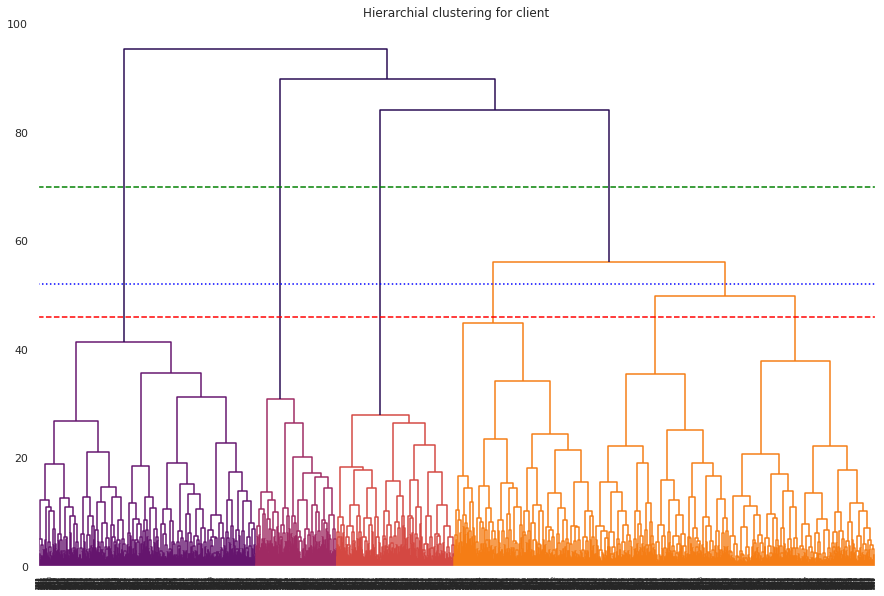

In [18]:
#ранее мы разделили наши данные на признаки (матрица X) и целевую переменную (y), где из X убрали столбец 'Churn'
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for client')
plt.axhline(y = 46, color ="red", linestyle ="--")
plt.axhline(y = 52, color ="blue", linestyle =":")
plt.axhline(y = 70, color ="green", linestyle ="--")
plt.show() 

**Если посмотреть на иерархическую кластеризацию, то дендрограмма явно формирует 4 больших кластера. Однако, по условию задачи мы будем делить на 5 кластеров, хотя в реальной жизни я посчитала бы, что деление на 6 кластеров здесь было бы более уместным**. 

In [19]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters = 5, random_state = 0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(X_sc)

# сохраняем метки кластера в поле нашего датасета
df['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
clusters = pd.DataFrame(df.groupby(['cluster_km']).mean())
display(clusters.sort_values(by = 'Churn', ascending = False))

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.499109,0.000000,0.488414,0.076649,1.0,3.032086,0.235294,28.721925,137.540009,2.853832,3.060606,1.770413,1.606619,0.399287
2,0.505300,1.000000,0.238516,0.059187,1.0,2.819788,0.000000,28.770318,143.383993,2.650177,3.343640,1.800647,1.645965,0.381625
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
3,0.544202,1.000000,0.250287,0.079219,1.0,4.528129,1.000000,29.536165,148.088897,4.165327,3.761194,1.941342,1.845911,0.200918
1,0.488571,0.995238,0.955238,0.892381,1.0,7.660952,0.458095,29.543810,155.861428,6.988571,4.380952,1.978963,1.933736,0.120952


**Выводы на основе средних значений признаков для кластеров:**
- **Наибольшая доля оттока у кластеров 0 и 2**
- **Наиболее надежный кластер 1**. Посмотрим на их средние значения. 

***Опишем общую картину:***
- **Распределение по полу +- равномерное**, соотношение варьируется **в диапазоне 49-54%**.
- Только в **4 кластер** попали **клиенты, не указавшие свой номер телефона**. **В остальных кластерах содержатся 90% клиентов, которые указали свой номер телефона**. 
- **Кластер 2 и 3** состоят **только из клиентов, предпочитающих фитнес рядом с домом или работой**. **С долей клиентов > 99%, предпочитающих фитнес рядом с домом и работой, распределены значения в кластере №1**. **В кластере 0** - только клиенты, для которых этот признак не важен. 
- **Кластер 1** состоит **на 95% из лиц, пользующихся скидками партнеров**. **В кластерах 0 и 4** распределение практически 50/50. Лишь **в кластерах 2 и 3 количество таких клиентов составляет лишь четверть**. 
- **Кластер 2** состоит из **клиентов, которые ни разу не посещали групповые занятия**. Напротив, **кластер 3** состоит **только из клиентов, пользующихся услугами "Групповой тренинг"**. 
- **Средний возраст клиента во всех кластерах находится в диапазоне от 28 до 29 лет**. 
- **Ниже чем у других доход от приобретения дополнительных услуг у кластера 0**, в то время как **наибольшие средние траты у клиентов из кластера 1**. **Между остальными кластерами распределение +- одинаковое по доходу**. 
- **На более длительный период** покупают абонемент **клиенты из кластера 1 (более 7 месяцев в среднем)**. **Более короткий период у кластеров №2 и №0** - 2.8 и 3 месяца соответственно. **В кластерах 4 и 3 средние значения варьируются в диапазоне от 4 до 5 месяцев**.  
- **По Lifetime распределение по кластерам +- равномерное**. Колеблется в диапазоне **3-4 месяцев**. **Выше у кластера №1 - более 4 месяцев**. 
- По количеству посещения в неделю распределение также +- равномерное. **Заметна тенденция, чем меньше значение количества визитов в неделю, тем выше вероятность повышения показателя оттока.**



Далее построим распределения признаков для кластеров. 

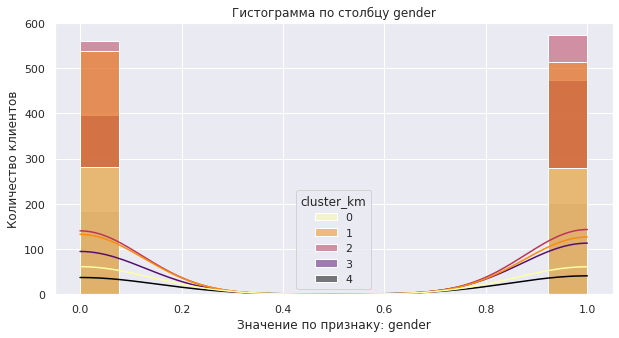

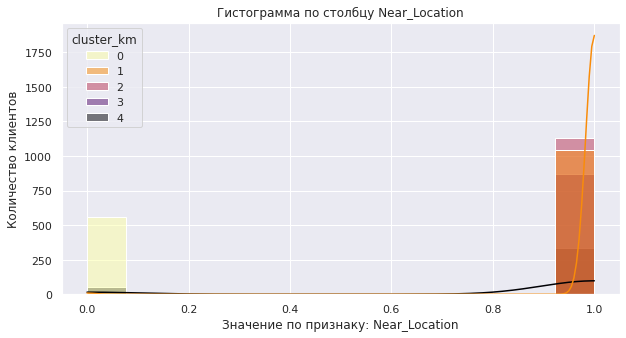

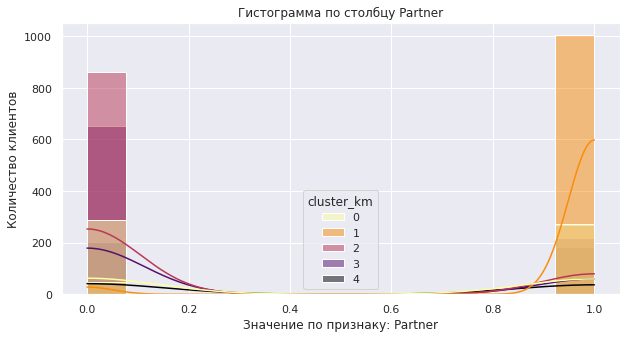

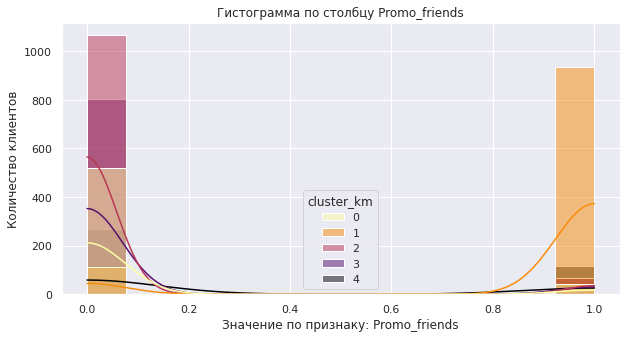

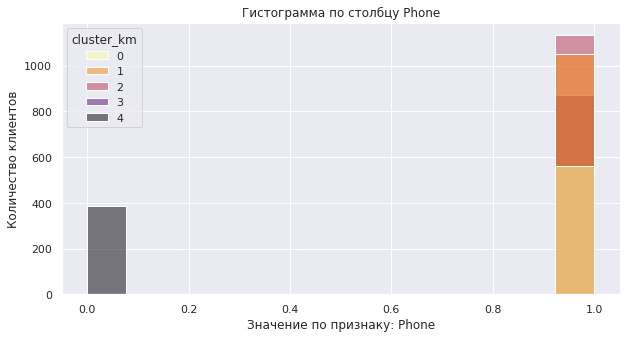

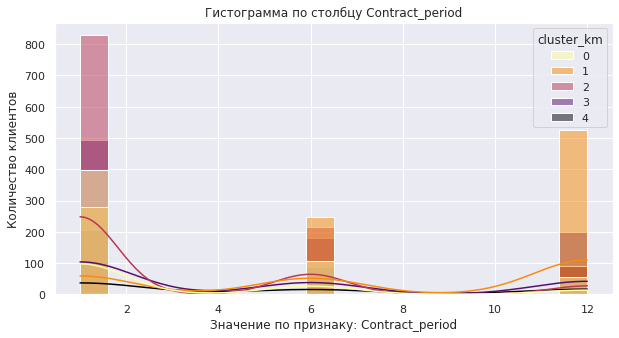

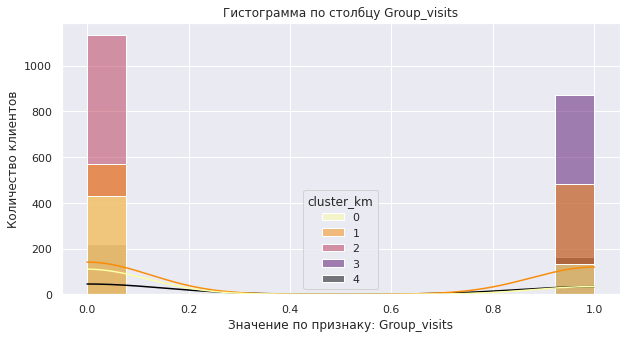

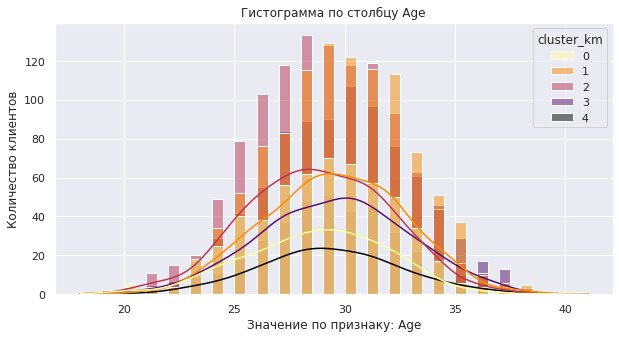

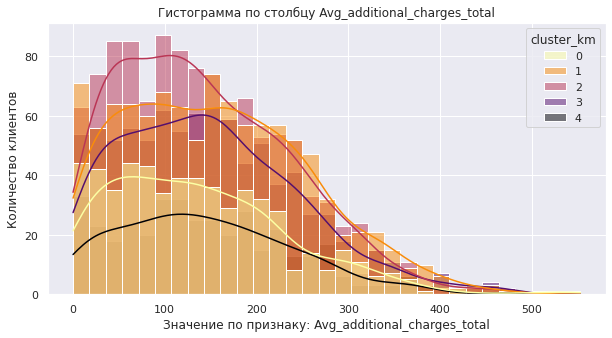

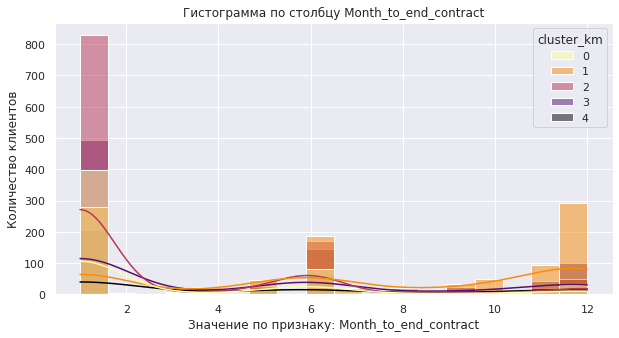

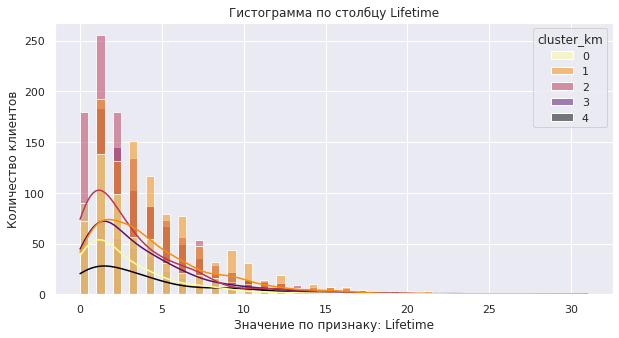

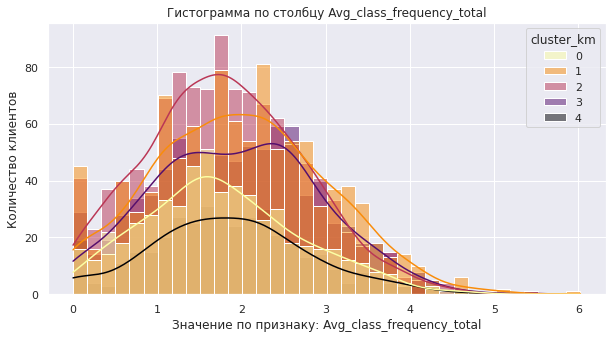

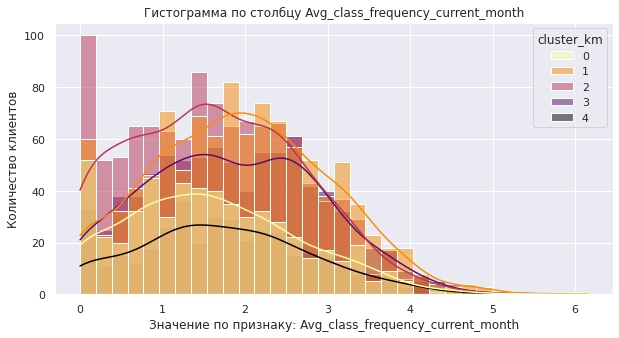

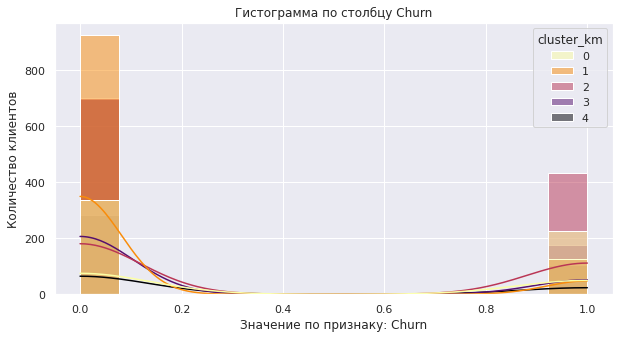

In [20]:
#построим распределения признаков для кластеров.
for column in df.drop('cluster_km', axis = 1).columns:
    plt.figure(figsize=(10, 5))
    plt.title('Гистограмма по столбцу ' + column)
    sns.histplot(data = df, x = column, hue = 'cluster_km', kde = True, palette = 'inferno_r', alpha = 0.5)
    plt.ylabel('Количество клиентов') # y-метка
    plt.xlabel('Значение по признаку: ' + column) # x-метка
    plt.show()

**Гистограммы снова помогли нам визуализировать те выводы, которые мы сделали, изучив таблицу со средними значениями**. 
Кластер 2 и 3 состоят только из клиентов, предпочитающих фитнес рядом с домом или работой. С долей клиентов > 99%, предпочитающих фитнес рядом с домом и работой, распределены значения в кластере №1. В кластере 0 - только клиенты, для которых этот признак не важен.

- **Кластер 0**:
    - Доля оттока: **39.93**
    - Средний возраст: **нормальное распределение, пиковые значения в области 28-30 лет**
    - Пользуется ли скидками партнера: **1/2 клиентов**
    - Важно ли расположения рядом с домой или работой: **нет**
    - Средняя продолжительная абонемента: **предпочитают абонементы на 1 (медиана == 1) и 6 месяцев (75% значений расположены в диапазоне 1:6 месяцев)**. При этом среднее значение 3 месяца. 
    - Лайфтайм: **пиковые значения смещены как и в кластере 2 влево. В среднем 3 месяца, при медиане равной 2-м месяцам**. 
    - Количество занятий в неделю: *статистика за предыдущий месяц хуже, чем статистика за весь период, поэтому будем оценить по столбцу total*. **Нормальное распределение в диапазоне от 1 до 3 посещений**. Пик расположен около 2 посещений в месяц. 
- **Кластер 1**:
    - Доля оттока: **12.10**
    - Средний возраст: **нормальное распределение, пиковые значения в области 28-30 лет**
    - Пользуется ли скидками партнера: **Вероятность стремится к 100%**
    - Важно ли расположения рядом с домой или работой: **да**
    - Средняя продолжительная абонемента: **предпочитают абонементы на 6 (медиана == 6) и 12 месяцев (25% значений == длительность абонемента в 12 месяцев)**. При этом среднее значение более 7 месяцев. 75% значений лежат в диапазоне от 1 до 6 месяцев. 
    - Лайфтайм: **самый высокий среди всех кластеров. Средний более 4 месяцев, при медиане равной 3 месяцам**. 
    - Количество занятий в неделю:**Нормальное распределение в диапазоне от 1 до 3 посещений**. Пик расположен около 2 посещений в месяц. 
- **Кластер 2**:
    - Доля оттока: **38.16**
    - Средний возраст: **нормальное распределение, пиковые значения в области 27-29 лет**
    - Пользуется ли скидками партнера: **1/4 клиентов**
    - Важно ли расположения рядом с домой или работой: **да**
    - Средняя продолжительная абонемента: **большинство предпочитает абонемент на 1 месяц**. При этом среднее значение более 2, но менее 3 месяцев. 
    - Лайфтайм: **пиковые значения смещены как и в кластере 0 влево. В среднем 3 месяца, при медиане равной 2-м месяцам**.
    - Количество занятий в неделю:**Нормальное распределение в диапазоне от 1 до 3 посещений**. Пик расположен около 2 посещений в месяц. 
- **Кластер 3**:
    - Доля оттока:  **20.09**
    - Средний возраст: **нормальное распределение, пиковые значения в области 29-31 лет**
    - Пользуется ли скидками партнера: **1/4 клиентов**
    - Важно ли расположения рядом с домой или работой: **да**
    - Средняя продолжительная абонемента: **предпочитают абонементы на 1 (медиана == 1) и 6 месяцев (75% значений расположены в диапазоне 1:6 месяцев)**. При этом среднее значение 4,5 месяца. 
    - Лайфтайм: **медиана и среднее значение +- одинаковые. Средние показатели около 3 месяцев**. 
    - Количество занятий в неделю:**Нормальное распределение в диапазоне от 1 до 3 посещений**. Пик расположен около 2 посещений в месяц. 
- **Кластер 4**:
    - Доля оттока: **26.68**
    - Средний возраст: **нормальное распределение, пиковые значения в области 28-29 лет**
    - Пользуется ли скидками партнера: **1/2 клиентов**
    - Важно ли расположения рядом с домой или работой: **более чем на 85% вероятность, что да**
    - Средняя продолжительная абонемента: **предпочитают абонементы на 1 (медиана == 1) и 6 месяцев (75% значений расположены в диапазоне 1:6 месяцев)**. При этом среднее значение 4,7 месяца. 
    - Лайфтайм: **очень схожа с картиной кластера №3, однако, максимальное значение выше, поэтому среднее сместилось ближе к 4 месяцам при медиане равной 3 месяцам**.
    - Количество занятий в неделю:**Нормальное распределение в диапазоне от 1 до 3 посещений**. Пик расположен около 2 посещений в месяц. 

In [21]:
#для каждого полученного кластера посчитаем долю оттока (методом groupby())

df_cluster = df.groupby('cluster_km')['Churn'].mean().sort_values(ascending = False).reset_index().rename(columns = {'Churn': 'Доля оттока, %', 'cluster_km': 'Кластер'})
df_cluster['Доля оттока, %'] = round(df_cluster['Доля оттока, %'] * 100, 2)

df_cluster

,Кластер,"Доля оттока, %"
0,0,39.93
1,2,38.16
2,4,26.68
3,3,20.09
4,1,12.10


***Следует отметить, что кластеры отличаются по доле оттока***:
- **Наиболее склонные к оттоку** кластеры **0 и 2**. 
- **Четверть клиентов подвержена оттоку** в кластере **4**.
- **Наиболее надежные кластеры - 1 и 3**. 

## Шаг 5. Выводы и базовые рекомендации по работе с клиентами:

- Необходимо:
   - Сформулировать основные выводы и предложить рекомендации для стратегии взаимодействия с клиентами и их удержания.

***Выводы***

По ходу проекта большинство выводов уже были сделаны. Они более подробны и подкреплены либо данными из таблиц, либо графиками.

**Для того, чтобы улучшить политику удержания нужно еще раз напомнить портрет клиента, который уходит в отток (краткие выжимки, более полная картина на Шаге 2)**:

- Явное преобладание лиц, приобретающих абонемент на месяц. 
- Возраст клиента от 20 до 35 лет, при том, что большинство значений лежит между 25 и 27 годами. Наиболее молодые представители по сравнению с теми, кто продолжил пользоваться услугами фитнес-клуба. 
- Большинство значений по признаку средней стоимости оплаченных доп.услуг варьируется в диапазоне до 100.
- Распределение по количеству месяцев до конца абонемента не равномерное. В основном представлено значения в диапазоне 1,2 месяца.
- По признаку 'Lifetime' достаточно короткая продолжительность пользования услугами с момента первого посещения. При пике в 1 месяц, скачкоорразное и быстрое снижение количества пользователей при приближении к 5 месяцам. Жизненный цикл тех, кто подвержен оттоку не велик. **Стоит отметить, что мы определили, что 40% из тех, кто ушел в отток, имел Lifetime == 0 (а это 403 клиента)**
- По средней частоте посещений зала в неделю как в общем с момента начала абонемента, так и в предыдущем месяце, наблюдается большое количество тех, кто ни разу не посетил зал в предыдыщем месяце. В общем с момента начала абонемента их доля также высока. Большинство значений в общем с момента начала абонемента лежит между 1 и 2 посещениями, в то время как в предыдущем месяце это значение было смещено влево и было распределено около 1 посещения в неделю.

**Далее мы строили модели, проводили кластеризацию пользователей и определяли, кто больше подвержен оттоку, а кто подвержен в меньшей степени**.

**Высокая вероятность оттока у клиентов из кластеров 0 и 2. Объединим общие портреты по ним в одну текстовую картину:**
- Средний возраст: **нормальное распределение, пиковые значения в области 27-30 лет**
- Пользуется ли скидками партнера: **менее 50% клиентов** пользуются услугами партнеров
- Важно ли расположения рядом с домой или работой и средняя продолжительность абонемента: 
    - **либо лица, которым не важно расположение и которые приобретают абонемент на 1-6 месяцев**
    - **либо лица, которым важно расположение, при этом срок действия абонемент ближе к 1 месяцу**. 

- **Лайфтайм**: пиковые значения смещены влево. **В среднем 3 месяца, при медиане равной 2-м месяцам**.
- **Количество занятий в неделю**: статистика за предыдущий месяц хуже, чем статистика за весь период, поэтому будем оценить по столбцу total. Нормальное распределение в диапазоне **от 1 до 3 посещений. Пик расположен около 2 посещений в неделю**.

***Базовые рекомендации***

- **Так как 403 клиента приобрели абонемент, но так и не пришли в зал, попав в отток (а это 40% из тех, кто ушел в отток), то в первую очередь, необходимо вовлечь их. Это можно осуществить через**:
   - предложение о бесплатной вводной персональной тренировке
   - рассылка информации о групповых занятиях и напоминание *(как в Stepic)*, о сроке, в течение которого клиента не видели в фитнес клубе. Технология холодных звонков не рассматривается, так как это раздражает обычного здравомыслящего человека. 
   Думаю, что такие шаги могут быть расценены как первые шаги на пути удержания такой группы клиентов.
   
- **Среди тех, кто подвержен оттоку, меньшее количество клиентов (по сравнению с текущими) пользовались услугами партнеров. В этой связи**:
   - Необходимо либо расширить сетку партнеров (что может быть с экономической точки зрения не выгодно для фитнес-клуба)
   - Дополнительно пересмотреть влияние стоимости абонемента на желание его продлевать. Для этого нужно провести отдельное аналитическое "расследование". Возможно, скидка от партнера существенно, что в том числе влияет на Lifetime пользователя и желание покупать абонемент на более долгий срок. 
   
- **Среди тех, кто подвержен оттоку, многие приобретали абонемент на месяц, отток таких клиентов наиболее существенен чем среди тех, кто купил абонемент на 6 или 12 месяцев. В этой связи**:
   - Необходимо просмотреть книгу жалоб и предложений, возможности фитнес-клуб не удовлетворяет каким-то ожиданиям клиента. Собрать отзывы из сети Интернет, провести анализ удовлетворенности клиента услугами.
   - Провести внутреннюю оценку клиентами услуг, представляемых фитнес-центром. Через анкетирование, социальные сети, рассылки на почту. 
   - Оценить как работют менеджеры по продажам. Насколько качественна связь между клиентом и фитнес-клубом. 
   - Оценить, что позволяет клиентам с достаточно длинным Lifetimом быть приверженцем именно этого фитнес-клуба более 1 года. 

**Думаю, что текущие рекомендации позволят положить начало формированию политики по удержанию клиентов**. 